# Final Project  
-Derek Allmon 
-Yousuf Kanan

## Description 
---
 



# Frame the Problem and Look at the Big Picture 

---
#### 1. Define the objective in business terms.
    Our objective is to predict what patients would be more likley to have a readmission into the hospital within 30 days of treatment. 

#### 2. How will your solution be used?
    Our solution will be used to help find what comminalites patients may have that make them more suceptible to being readmitted to the hospital. This will help to give more preventable care to patients and will reduce the cost for healthcare facilites and improve the health of patients. 

#### 3. What are the current solutions/workarounds (if any)?
    Our team was not provided with any current solutions to the issue. We can assume that each medical facility has certain protocols on how to best prevent patient re-admission.

#### 4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
    This problem should be framed as a surpervided offline learning problem. This problem could be an online problem to track changes over time as more information is gain but we do not currently have access to this data. 

#### 5. How should performance be measured?

#### 6. What would be the minimum performance needed to reach the business objective?

#### 7. What are comparable problems? Can you reuse experience or tools?
    
#### 8. Is human expertise available?
    We currently do not have any human expertise avialable 

#### 9. How would you solve the problem manually?
    To solve the problem manually our team would use data to see which patients are re-admitted and see what obvious commonallites could be found from said data

#### 10. List the assumptions you (or others) have made so far.
    - The data is accurate and up to data 
    - The data is labeled correctly 
    

# Get the Data
---
#### 1. List the data you need and how much you need.
We will need patient data including age, race, sex, and any medical data that is avalible without exposing any sensative information 

#### 2. Find and document where you can get that data.

 We aquired the data through [UC Irving Machine Learning Repository](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

#### 3. Get access authorizations.
- N/A 

#### 4. Create a workspace (with enough storage space).
- N/A

#### 5. Get the data.

#### 6. Convert the data to a format you can easily manipulate (without changing the data itself).


In [17]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from pandas.tseries.offsets import MonthEnd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
import matplotlib.pyplot as plt



In [34]:
# load the data
df = pd.read_csv('diabetic_data.csv')

# seperate the test and training set 
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






# Data Exploration 


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [36]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

Based on the graphs above , it seems that the when looking at lab proceeders, there is a concentration of patinets returning to the hospital within 30 days. This is a good indicator that the # of lab proceeders could be a good feature to use in our model.



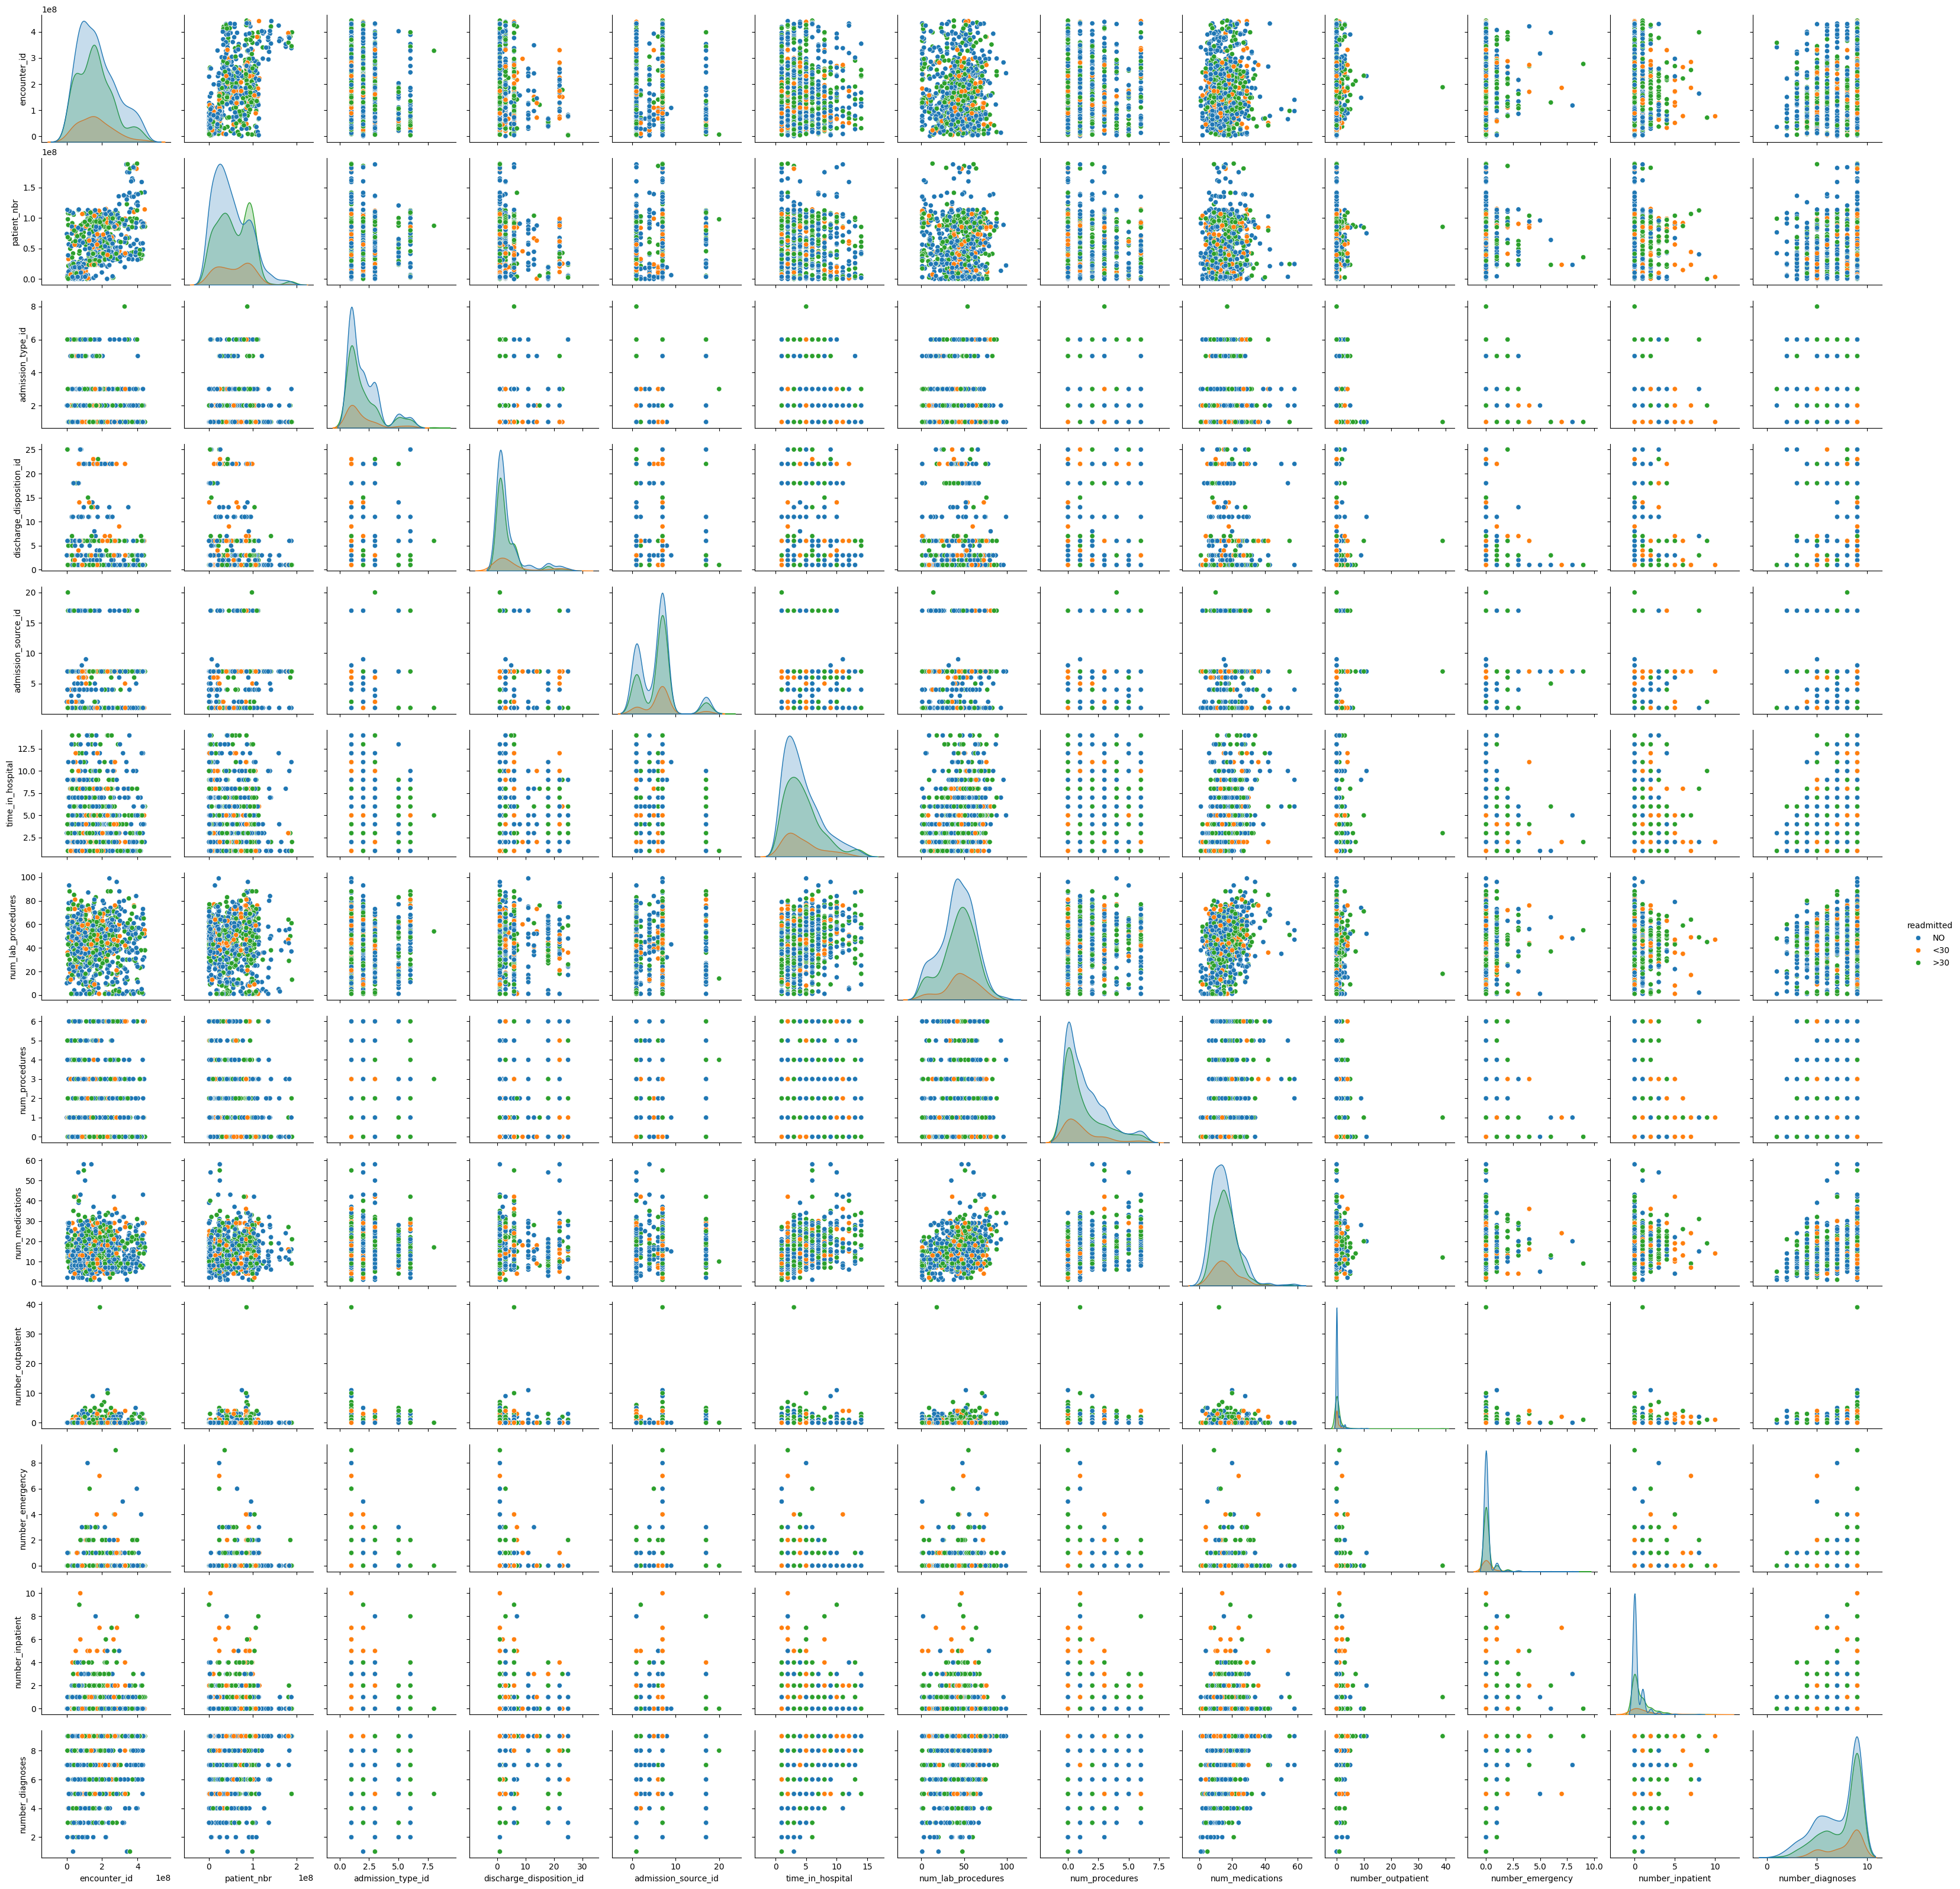

In [37]:
sns.pairplot(df.sample(1000), hue='readmitted', diag_kind='kde')
plt.show()

In [38]:
df['weight'].value_counts()


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

Because the weight column is missing a lot of values, we should consider dropping it from our model, also 
it sems concerning that the most common weight is 75-100 lbs, this could be a sign that the data is not accurate.

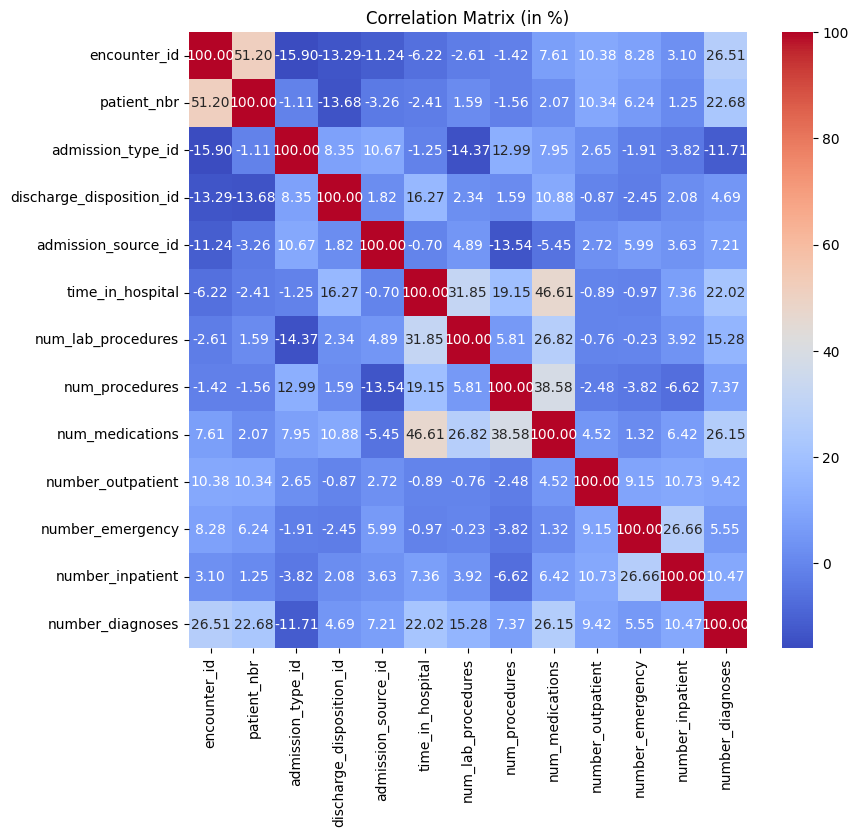

In [39]:
# Get the correlation matrix of numerical columns only
df2 = df.select_dtypes(include=[np.number])
corr = df2.corr()

# Normalize the correlation matrix to show percentages
corr_percent = corr * 100

# Plot the heatmap
plt.figure(figsize=(9, 8))  # Adjust the figure size as needed
sns.heatmap(corr_percent, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (in %)')
plt.show()


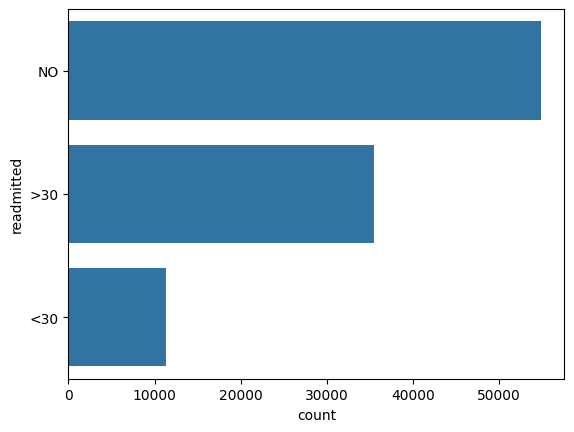

In [9]:
#look at the target variable distribution
sns.countplot(df['readmitted'])
plt.show()

Because there are 3 diffrent classed of readmission, we will need to treat this as a multi-class classification problem. We will incorporate a scoring system for each readmission class. if the patient is readmitted within 30 days, they will be given a score of 1, if they are readmitted within >30 days, they will be given a score of 2, and if they are not readmitted, they will be given a score of 3. This will allow us to use a single model to predict the readmission class.

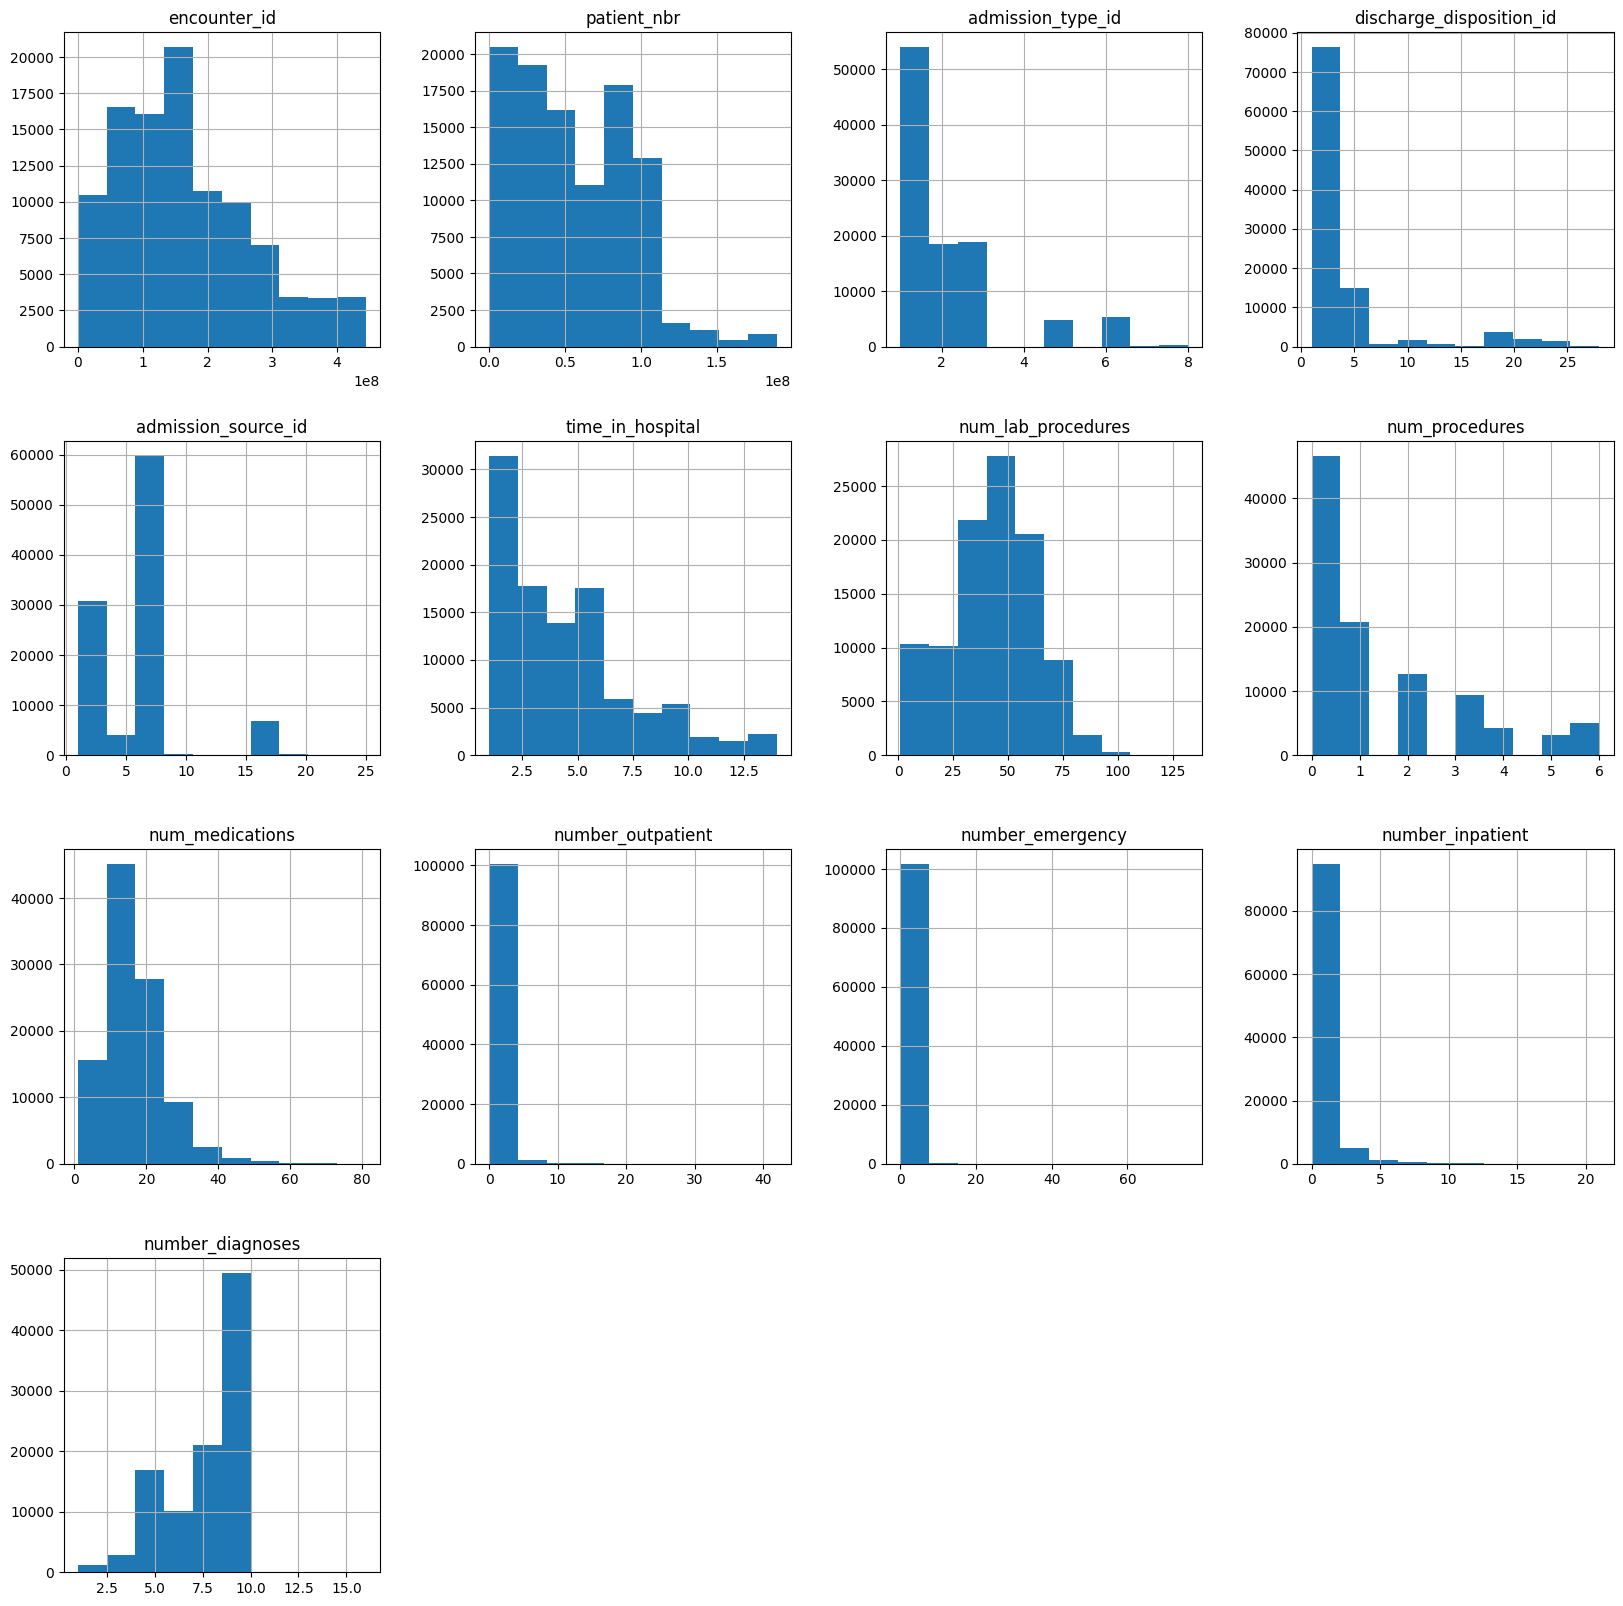

In [10]:
# look at the distribution of the numerical columns but make it look nicer
df2.hist(figsize=(20,20))
plt.show()


Most of the patients addmitted are addmitted due to emergency reasons. 

In [40]:
# look at infomraiton about the categorical columns
df.describe(include=['O'])

race  gender      age  weight payer_code medical_specialty  \
count      101766  101766   101766  101766     101766            101766   
unique          6       3       10      10         18                73   
top     Caucasian  Female  [70-80)       ?          ?                 ?   
freq        76099   54708    26068   98569      40256             49949   

        diag_1  diag_2  diag_3 max_glu_serum  ... citoglipton insulin  \
count   101766  101766  101766          5346  ...      101766  101766   
unique     717     749     790             3  ...           1       4   
top        428     276     250          Norm  ...          No      No   
freq      6862    6752   11555          2597  ...      101766   47383   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
count               101766              101766                   101766   
unique                   4                   2                        2   
top                     No                  No                       No   
freq                101060              101753                   101765   

       metformin-rosiglitazone metformin-pioglitazone  change diabetesMed  \
count                   101766                 101766  101766      101766   
unique                       2                      2       2           2   
top                         No                     No      No         Yes   
freq                    101764                 101765   54755       78363   

       readmitted  
count      101766  
unique          3  
top            NO  
freq        54864  

[4 rows x 37 columns]

/var/folders/f8/pyz20pzd513676ck8xv53jsm0000gp/T/ipykernel_43032/2664730038.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered['race_num'] = df_filtered['race'].replace({'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Asian': 3, 'Other': 4, "?":5}).astype(int)


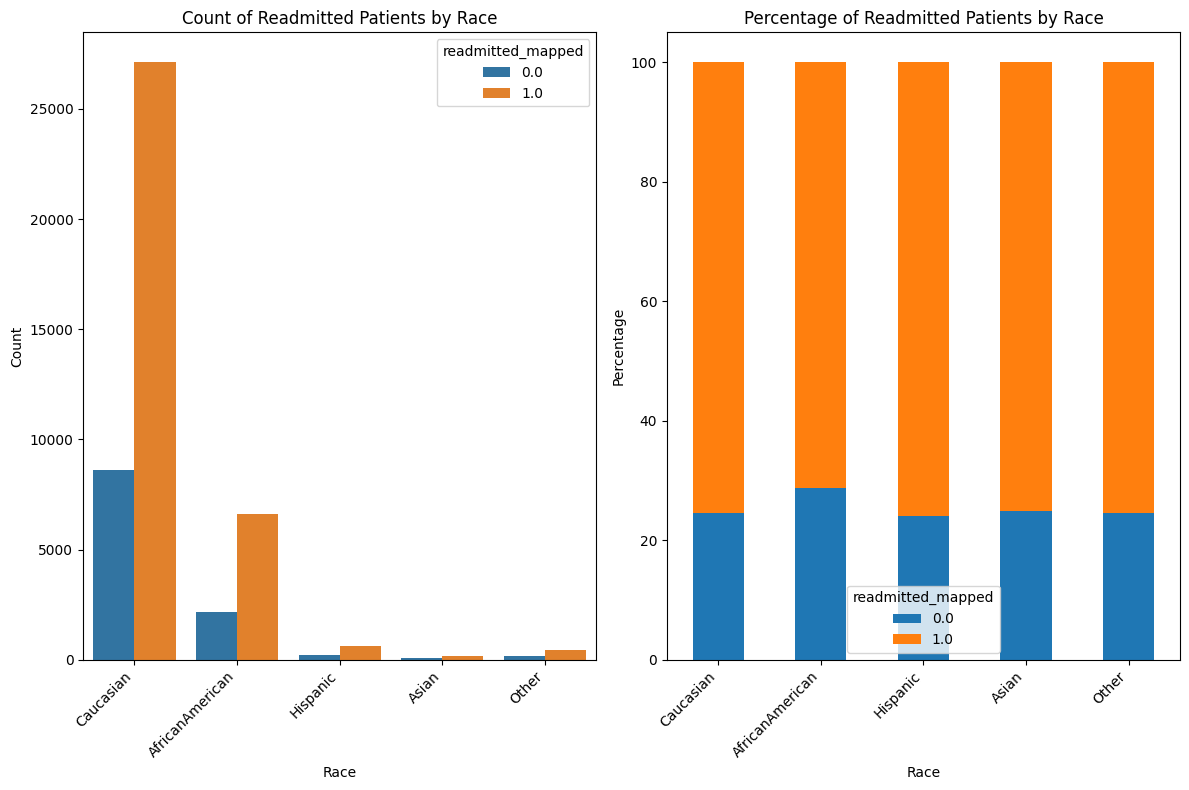

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with '?' in the 'race' column
df_filtered = df[df['race'] != '?'].copy()  # Using .copy() to avoid setting with copy warning

# Convert 'race' to a numerical feature safely
df_filtered['race_num'] = df_filtered['race'].replace({'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Asian': 3, 'Other': 4, "?":5}).astype(int)

# Convert 'readmitted' to the desired categories for legend mapping safely
readmitted_map = {'<30': 0, '>30': 1, 'No': 2}
df_filtered.loc[:, 'readmitted_mapped'] = df_filtered['readmitted'].map(readmitted_map)

# Set the figure size for both plots
plt.figure(figsize=(14, 10))

# Subplot 1: Original count plot
plt.subplot(1, 2, 1)
sns.countplot(x='race_num', hue='readmitted_mapped', data=df_filtered)
plt.xticks([0, 1, 2, 3, 4], ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'], rotation=45, ha='right')
plt.title('Count of Readmitted Patients by Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Subplot 2: Percentage stacked bar plot
plt.subplot(1, 2, 2)
# Group by 'race' and calculate the percentage of readmitted patients for each race
readmission_by_race = df_filtered.groupby('race')['readmitted_mapped'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Convert the index to string for plotting
readmission_by_race.index = readmission_by_race.index.astype(str)

# Plot the data as a stacked bar plot
readmission_by_race.plot(kind='bar', stacked=True, figsize=(12, 8), ax=plt.gca())

plt.title('Percentage of Readmitted Patients by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2, 3, 4], ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'], rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

The Probability of an African American patient being readmitted within 30 days is higher than the probability of a Caucasian patient being readmitted within 30 days. This could be a good feature to use in our model. 

It is also interesting to note that this might indicate that African American patients are not receiving the same level of care as Caucasian patients. This would have to be further investigated, a hypothesis test could be conducted to determine if this is statistically significant.

In [44]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['race'], df_filtered['readmitted_mapped'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant association between race and readmission.")
else:
    print("No statistically significant association found between race and readmission.")


Chi-Square Test Results:
Chi2 Statistic: 3.667864242664743
P-Value: 0.4528171253109812
Degrees of Freedom: 4
Expected Frequencies:
[[ 2125.87363565  6663.12636435]
 [   54.66463098   171.33536902]
 [ 8638.94672557 27077.05327443]
 [  206.564579     647.435421  ]
 [  142.95042879   448.04957121]]
No statistically significant association found between race and readmission.


The results of the chi-squared test indicate that race does have an impact on the readmission rate. Not only is 
this something that can help us in our model, but it is also something that should be investigated further by the hospital to ensure that all patients are receiving the same level of care.

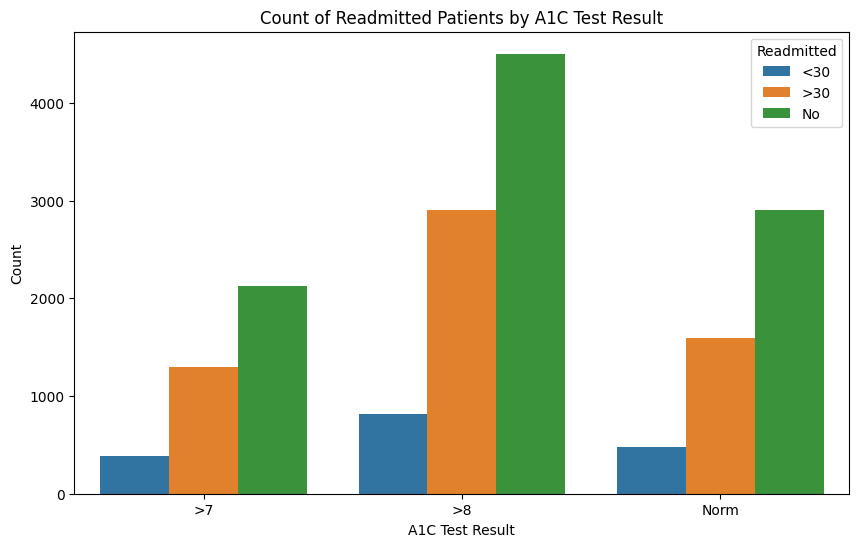

<Figure size 1200x800 with 0 Axes>

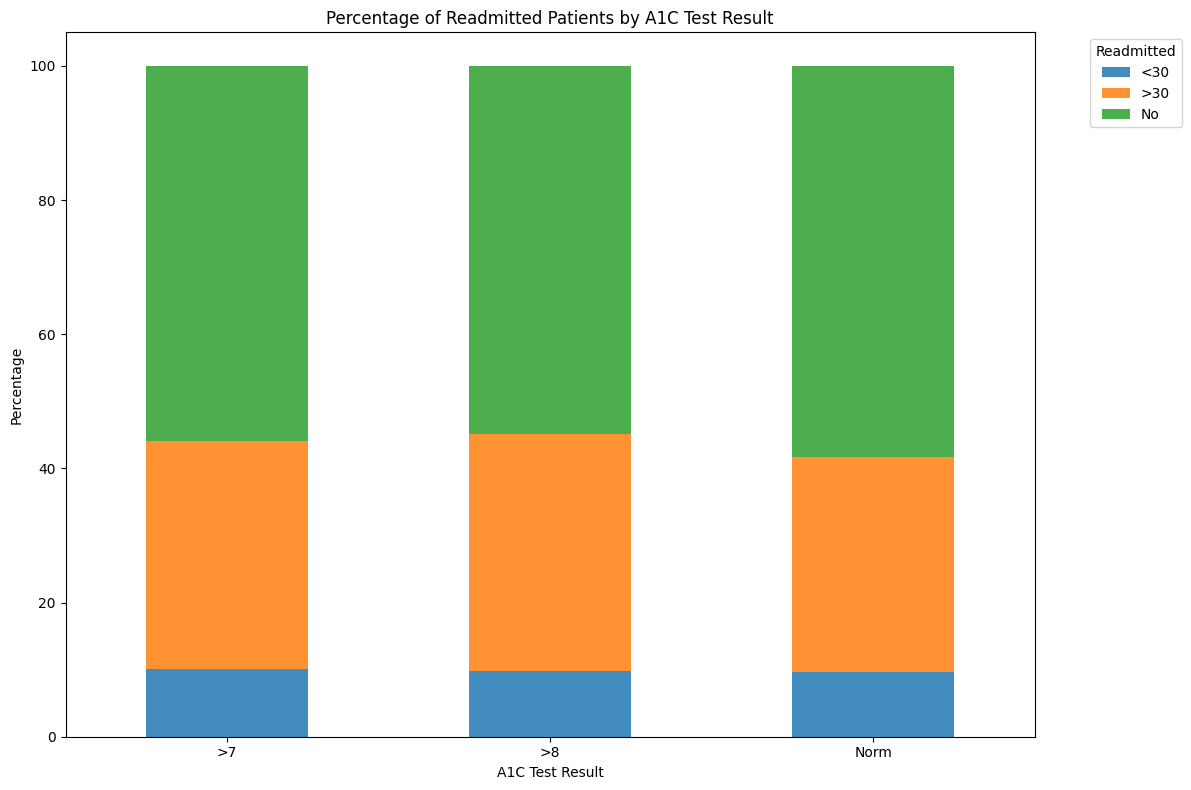

Chi-Square Test Results:
Chi2 Statistic: 16.78496097419544
P-Value: 0.0021280034928395078
The relationship between A1C Test Results and Readmission is statistically significant.


In [47]:
# Check if 'readmitted_mapped' exists in the original DataFrame
if 'readmitted_mapped' not in df.columns:
    # Assuming 'readmitted' column exists and needs to be mapped
    df['readmitted_mapped'] = df['readmitted'].map({
        '<30': '<30',
        '>30': '>30',
        'NO': 'No'
    })

# Filter out rows with '?' in the 'A1Cresult' column
df_a1c = df[df['A1Cresult'] != '?'].copy()  # Avoid setting with copy warning

# Ensure 'readmitted_mapped' is categorical for proper sorting and analysis
df_a1c['readmitted_mapped'] = pd.Categorical(
    df_a1c['readmitted_mapped'], categories=['<30', '>30', 'No'], ordered=True
)

# Countplot: Count of readmitted patients by A1C result
plt.figure(figsize=(10, 6))
sns.countplot(x='A1Cresult', hue='readmitted_mapped', data=df_a1c)
plt.title('Count of Readmitted Patients by A1C Test Result')
plt.xlabel('A1C Test Result')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

# Stacked Bar Chart: Percentage of readmitted patients by A1C result
# Normalize the value counts to calculate percentages
readmission_by_A1C = (
    df_a1c.groupby('A1Cresult')['readmitted_mapped']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

plt.figure(figsize=(12, 8))
ax = readmission_by_A1C.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.85)
ax.set_title('Percentage of Readmitted Patients by A1C Test Result')
ax.set_xlabel('A1C Test Result')
ax.set_ylabel('Percentage')
plt.xticks(rotation=0)  # Make labels horizontal for readability
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Additional Analysis: Chi-Square Test for Independence

# Create a contingency table
contingency_table = pd.crosstab(df_a1c['A1Cresult'], df_a1c['readmitted_mapped'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("The relationship between A1C Test Results and Readmission is statistically significant.")
else:
    print("No statistically significant relationship found between A1C Test Results and Readmission.")

on visual inspection it does not seem that a1c test results have a significant impact on readmission rates, but 
a chi-squared test determined that the realtionship between a1c test results and readmission rates is statistically significant.

Text(0, 0.5, 'Number of Diagnoses')

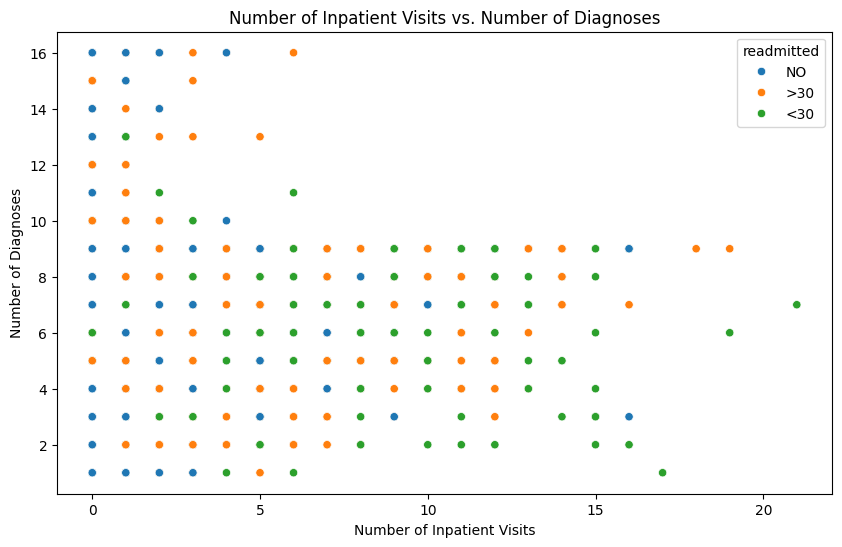

In [48]:
# plot some scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_inpatient', y='number_diagnoses', hue='readmitted', data=df)
plt.title('Number of Inpatient Visits vs. Number of Diagnoses')
plt.xlabel('Number of Inpatient Visits')
plt.ylabel('Number of Diagnoses')



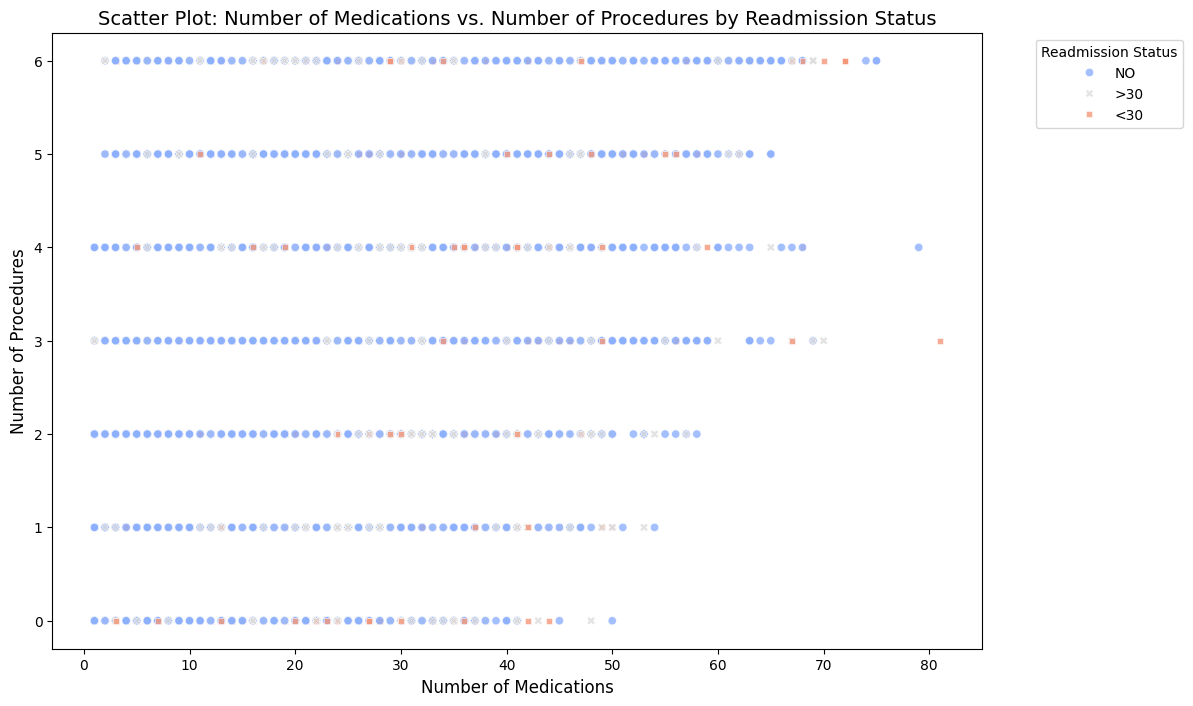

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='num_medications',
    y='num_procedures',
    hue='readmitted',  # Different colors for readmitted status
    style='readmitted',  # Different markers for readmitted status (optional)
    data=df,
    alpha=0.8,  # Transparency for overlapping points
    palette="coolwarm"  # Custom color palette
)

# Titles and labels
plt.title('Scatter Plot: Number of Medications vs. Number of Procedures by Readmission Status', fontsize=14)
plt.xlabel('Number of Medications', fontsize=12)
plt.ylabel('Number of Procedures', fontsize=12)
plt.legend(title='Readmission Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [51]:
#perform a chi-square test to see if there is a relationship between the number of medications and readmission
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['num_medications'], df['readmitted'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi2 Statistic: 1119.4132224407017
P-Value: 8.58737465246297e-149
Degrees of Freedom: 148


The results of the chi-squared test indicate that the number of lab procedures does have an impact on the readmission rate. This is something that can help us in our model.

## I'm not sure if these chi-squared tests (stats stuff) are helpful at all but still a crazy thing to look at. Will discuss with jeff tomorrow

In [52]:
# Let's do the pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer



In [53]:
df2 = df.copy()

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Features to drop
features_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 
                    'medical_specialty', 'max_glu_serum', 'A1Cresult']

# Numeric features
num_features = X.select_dtypes(include=[np.number]).columns

# Multi-label features (corrected syntax)
multi_label_features = [
    'metaformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
    'metformin-pioglitazone', 'race', 'addmission_type_id', 
    'discharge_disposition_id', 'admission_source_id'
]

# One-hot features
one_hot_features = ['change', 'diabetesMed']

# Replace '?' with np.nan in preprocessing step
replace_question_mark = Pipeline(steps=[
    ('replace_question_mark', SimpleImputer(strategy='constant', fill_value=np.nan))
])

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

multi_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Fixed transformer
])

one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Filter out missing columns
multi_label_features = [col for col in multi_label_features if col in X.columns]
one_hot_features = [col for col in one_hot_features if col in X.columns]
numeric_features = [col for col in num_features if col in X.columns]

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('multi_label', multi_label_transformer, multi_label_features),
        ('one_hot', one_hot_transformer, one_hot_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['encounter_id', 'patient_nbr',
                                  'admission_type_id',
                                  'discharge_disposition_id',
                                  'admission_source_id', 'time_in_hospital',
                                  'num_lab_procedures', 'num_procedures',
                                  'num_medications', 'number_outpatient',
                                  'number_emergency', 'number_inpatient',
                                  'numb...
                                  'glyburide-metformin', 'glipizide-metformin',
                                  'glimepiride-pioglitazone',
                                  'metformin-rosiglitazone',
                                  'metformin-pioglitazone', 'race',
                                  'discharge_disposition_id',
                                  'admission_source_id']),
                                ('one_hot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['change', 'diabetesMed'])])

In [57]:
# List of classifiers to compare, use the 10 most common classifiers , 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV




ModuleNotFoundError: No module named 'xgboost'